# 다중 회귀
요번에는 length 피쳐뿐만 아니라, length, height(높이), width(두께)까지 활용하는 모델을 만들어보자. 선형 회귀에서는 피쳐를 많이 활용할수록 모델의 성능은 좋아진다. 모델이 

- 1개의 피쳐를 기반으로 모델을 만들 경우, x축이 입력 피쳐, y축이 타겟인 평면을 학습함
- 2개의 피쳐를 기반으로 모델을 만들 경우, 모델은 평면을 학습함. 이 때 방정식은 $a_1x_1+a_2x_2+c$
- n개의 피쳐를 기반으로 만들 경우, 방정식은 $a_1x_1 + a_2x_2 + ... + a_nx_n + c$

👉 피쳐를 많이 쓰면 좋은 이유

- 모델에게 더 다양한 정보를 제공함으로써 복잡한 패턴을 학습할 수 있도록 하기 때문에, 일반적으로 성능 향상에 긍정적인 영향을 줌
- 다양한 피쳐를 활용하면, 변수 간 상호작용, 비선형 패턴, 복잡한 조건부 관계 등 더욱 다양한 패턴들을 알 수 있게된다.
- 피쳐 수가 많을수록 모델이 학습할 수 있는 함수 공간이 커져서, 더 정밀한 Decision Boundary를 만들 수 있게 된다.


- 다만, 많다고 다 좋은것은 아니다.
    - 차원의 저주
    - 모델 학습 시간 및 연산 자원 증가
    - 잘못된 피쳐(노이즈 피쳐 등)추가 시 오히려 성능 감소.      
    
따라서 적절한 피쳐 선택, 차원 축소 기법(PCA, L1 등)이 함께 고려되어야 한다.

In [31]:
import pandas as pd

perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
print(len(perch_full))
perch_full.head()

56


,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [32]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(len(perch_weight))

56


In [33]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

---
# 사이킷런의 변환기(transformer)
- 사이킷 런에서는 특성을 만들거나(Feature Engineering) 전처리하기 위한 다양한 클래스를 제공하는데, 이러한 클래스를 변환기(transformer)라고 함.
    - 본 실습에서는 `PolynomialFeatures` 변환기를 사용
    - 앞서 나온 LinearRegrssion과 같은 모델 클래스는 추정기(estimator)라고 함
- `PolynomialFeatures`는 선형 모델로 데이터의 비선형 관계를 모델링하고싶을 때, 다항 특성을 추가해주어 모델의 표현력을 높이기 위해 사용함
    - 각 피쳐값에 대한 다항식($x^2, x^3$ .. 등)과, 상호작용 항($x_ix_p$ .. 등)을 전처리해주는(만들어주는)클래스이다.
    - 다항식의 차수는 클래스의 `degree`옵션으로 조절할 수 있다. 예를 들어 `degree=3`이라면 3차항까지 만들어준다.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [36]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
train_poly[:5]

(42, 9)


array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276]])

위 코드에서처럼, `include_bias`옵션을 False로 줄 경우, 

In [37]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

- 결과를 보면 모델을 초기화한 후 `fit()` → `transform()`의 순서로 피쳐를 전처리함
    - `fit()`은 새롭게 만들어낼 피쳐의 조합을 찾아내기 위한 API
    - `transform()`은 만들어낸 피쳐의 조합을 기반으로 실제로 데이터를 변환하는 API

In [38]:
test_poly = poly.transform(test_input)

---
# 다중 회귀 모델 훈련하기
- 다시 강조하자면, 다중 회귀 모델의 학습은 선형 회귀 모델을 학습시키는 것과 동일하다. 즉 피쳐값들과 타겟값과의 관계가 여전히 선형적이라는 의미이다.
    - 다만 피쳐를 여러 개 활용할 뿐이다. 
    - 단일 변수 선형 회귀: $y=w_0 + w_1x_1$
    - 다중 변수 선형 회귀: $y=w_0 + w_1x_1 + ... + w_nx_n$
- 선형적이지 않은 회귀(비선형 회귀)의 예시 (파라미터의 일차 결합이 아닌 경우)
    - 다항 회귀: $y = w_0 + w_1 x + w_2 x^2 + \cdots + w_n x^n$
    - 로지스틱 회귀: $y = a \,\exp(b x)$
    - 지수 회귀: $y = \frac{1}{1 + \exp(- (w_0 + w_1 x_1 + \cdots + w_n x_n))}$

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [40]:
print(lr.score(test_poly, test_target))

0.9714559911594159


In [41]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [42]:
print(train_poly.shape)

(42, 55)


각 피쳐의 5차항까지 만들도록 지정할 경우, 55개의 피쳐가 생성됨

In [43]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999997811


In [44]:
print(lr.coef_.shape, lr.intercept_.shape)

(55,) ()


In [45]:
print(lr.score(test_poly, test_target))

-144.4051193329733


### 테스트 스코어가 음수인 이유
- 피쳐의 개수를 많이 사용할수록 선형 모델이 강력해지는건 맞음. 훈련셋에 대해 거의 완벽하게 학습할 수 있음
    - 다만, 너무 과하게 사용할수록 훈련셋에 점점 오버피팅됨
    - 즉 위 결과에서 음수가 나오는 이유는, 모델이 훈련셋에 너무 과적합되어있기 때문
    - 규제(Regularization)를 통해 오버피팅을 방지할 수 있음

---
# Regularization
- 선형 회귀에서의 규제는, 피쳐에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것
- 피쳐의 스케일을 정규화시키지 않으면, 여기에 곱해지는 계수값에 대해서도 차이가 발생 → 피쳐마다 곱해지는 계수값에 대해 각각 차이가 클수록 어떤 피쳐에 대해서는 크게크게 바뀌고, 어떤 피쳐는 아무리 많이 훈련해도 잘 바뀌지 않게됨
- 앞선 예시인 K-최근접 이웃 회귀(`KNeighborRegression`)에서 특성값을 정규화시켰던것처럼, 이번에도 각 피쳐를 정규화시켜 해결하자.
    - 직접 정규화시키는게 어렵진 않지만, 요번에는 사이킷런에서 제공하는 클래스(`StandardScaler`)를 통해 정규화시켜보자.
    - 다시 한번 상기시켜야하는 점은, 새롭게 들어오는 샘플(테스트셋)에 대해서도 정규화가 이루어져야 함.
- 선형 회귀에서 규제를 추가한 모델은 크게 릿지 회귀와 라쏘 회귀가 있음
    - 릿지 회귀(Ridge Regression): 계수의 제곱한 값을 기준으로 규제를 적용
    - 라쏘 회귀(Lasso Regression): 계수의 절댓값을 기준으로 규제를 적용

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [47]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("train score: ", ridge.score(train_scaled, train_target))
print("test score: ", ridge.score(test_scaled, test_target))

train score:  0.9896101671037343
test score:  0.979069397761538


훈련셋에 대한 점수가 조금 떨어지긴 했으나, 테스트셋에 대한 점수가 정상적으로 돌아왔음 → 오버피팅을 방지함으로써 얻어낸 결과

##### 최적의 `alpha`값 찾기
- `alpha`값은 규제의 정도를 지정하는 값
    - 값이 작으면 규제 강도가 약해짐 → 계수값을 조금만 줄이고 훈련셋에 핏해진다.
    - 값이 클수록 규제 강도가 세짐 → 계수값을 더 큰 폭으로 줄이고, 훈련셋에 핏해진다기보단, 전체적인 경향만 적당히 따라간다.

In [48]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

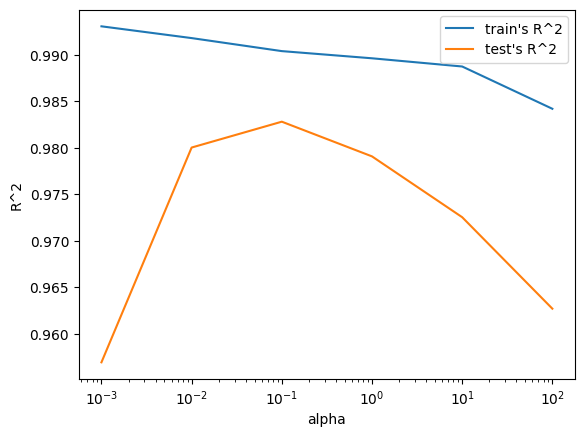

In [49]:
plt.plot(alpha_list, train_score, label="train's R^2")
plt.plot(alpha_list, test_score, label="test's R^2")
plt.xscale('log') # x축은 값의 범위가 너무 넓으므로, 로그 스케일로 나타내자.
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

- 왼쪽: 규제 강도가 약함 → 훈련셋은 매우 잘 맞추지만 새로운 데이터에 대해서는 못맞춤
- 오른쪽: 규제 강도가 강함 → 훈련셋은 좀 덜 맞추지만 새로운 데이터에 대해서도 꽤 잘 맞춤

최적의 `alpha`값으로 모델 다시 세팅하기

In [50]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386943


### 라쏘 회귀

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print("train score: ", lasso.score(train_scaled, train_target))
print("test score: ", lasso.score(test_scaled, test_target))

train score:  0.989789897208096
test score:  0.9800593698421886


라쏘 회귀 또한 릿지 회귀와 마찬가지로 alpha값을 조절함으로써 규제 강도를 조절할 수 있음

In [52]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/hong/anaconda3/envs/AI_Tech_project1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/hong/anaconda3/envs/AI_Tech_project1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


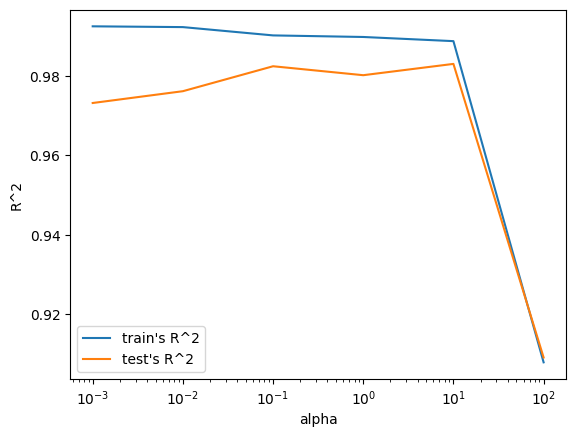

In [53]:
plt.plot(alpha_list, train_score, label="train's R^2")
plt.plot(alpha_list, test_score, label="test's R^2")
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [54]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print("train score: ", lasso.score(train_scaled, train_target))
print("test score: ", lasso.score(test_scaled, test_target))

train score:  0.9888067471131866
test score:  0.9824470598706695


---
# QA

👉 릿지 회귀랑 다르게 왜 라쏘 회귀에서는 규제 강도가 커질수록 성능이 크게 바뀌나요?

👉 라쏘 회귀에서는 계수값을 어떻게 0으로 만들수있고, 반면 릿지 회귀에서는 왜 계수를 0으로 만드는 경우가 드문건가요?

- 참고
    - 라쏘 회귀에서 계수가 0인 피쳐를 확인하려면 `.coef_`메서드를 활용하면 된다.
    - 라쏘 회귀의 이러한 특성을 이용해, 실질적으로 유용한 피쳐를 골라내는식으로 응용할수도 있다.

In [55]:
print(np.sum(lasso.coef_ == 0)) # 계수가 0인 피쳐의 개수

40


- (cf) 2차방정식 멋있게 그리기
    - 맷플롯립은 2차방정식을 직접적으로 그릴 수 없고, 짧은 직선을 이어그리는식으로 2차방정식을 그린다. 멋있게 2차방정식을 그리고싶으면 `Sympy`라이브러리를 활용하면 된다.



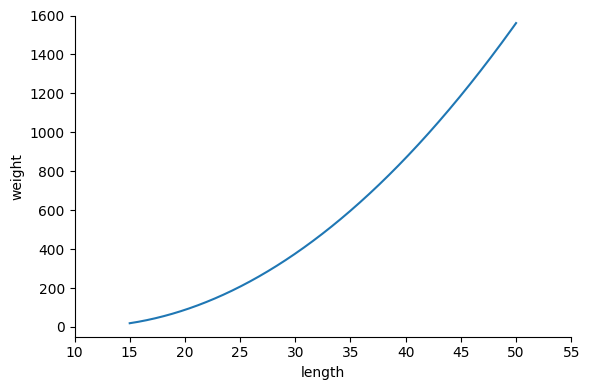

In [57]:
from sympy import *
from sympy.plotting import plot
import matplotlib.pyplot as plt

x = symbols('x')
y = 1.01*x**2 - 21.6*x + 116.05

plot(y, (x, 15, 50), xlabel='length', ylabel='weight', 
     xlim=(10,55), ylim=(-50, 1600), size=(6,4), axis_center=(10, -50))
plt.show()